# Introduction to Keras and Tensorow with Python

Introduction to Keras and Tensorflow with Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training data: {}, {}".format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28), (60000,)


In [2]:
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [3]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)
There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]

# Visualize the images

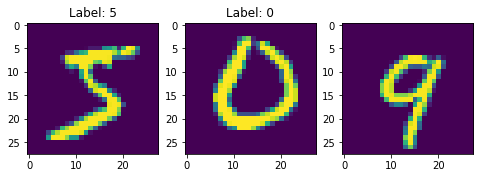

In [4]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

plt.subplot(1,3,3)
plt.imshow(test_images[12])

plt.show()

In [5]:
# Scale the Data
# As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values
# Dividing the data by 255 scales to the required range

train_images = train_images / 255.0
test_images = test_images / 255.0

# Split training data to training and validation sets

In [6]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]


print("x_train: {}".format(x_train.shape)) # prints x_train: (50000, 28, 28)
print("x_val: {}".format(x_val.shape)) # prints x_val: (10000, 28, 28)
print("y_train: {}".format(y_train.shape)) #prints y_train: (50000,)
print("y_val: {}".format(y_val.shape)) #prints y_val: (10000,)

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


# Reshape data from 28 * 28 array to a single array

In [7]:
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)
 
print("x_train: {}".format(x_train.shape))         #prints x_train: (50000, 784)
print("x_val: {}".format(x_val.shape))             #prints x_val: (10000, 784)
print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


# Encode labels to categorical variables

In [8]:
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

# Activation functions and Neural Networks hyperparameters

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# use the v1 syntax like this:

X = tf.compat.v1.placeholder(dtype="float",shape=[None, new_dimension])
Y = tf.compat.v1.placeholder(dtype="float",shape=[None, no_labels]) 


# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  # first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

  # second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight),
                                second_bias))

  # output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits

# Call the multilayer perception function
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
# we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)




Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
#initialise the variables
init = tf.global_variables_initializer()
epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

#train model
with tf.Session() as session:
    session.run(init)
    for epoch in range(epochs):
            average_cost = 0
            start, end = 0, batch_size
            
            for i in range(iteration):
                batch_x, batch_y = x_train[start: end], y_train[start: end]
                _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
                start += batch_size
                end += batch_size
                #average loss
                average_cost += loss/iteration
            print("Epoch========{}".format(epoch))
            
    #evaluate model
    prediction = tf.nn.softmax(logits)
    ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
    print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))


Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.9014000296592712


# Optimisation for training deep neural networks

In [11]:
# #Building a Sequential Feed Forward Network in Keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_labels, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
 metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1)
test_loss, test_accuracy = model.evaluate(test_images, y_test)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49986/50000 [============================>.] - ETA: 0s - loss: 0.2552 - acc: 0.9285

C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 137s 3ms/sample - loss: 0.2553 - acc: 0.9284 - val_loss: 0.1436 - val_acc: 0.9604
Epoch 2/20
50000/50000 [==============================] - 139s 3ms/sample - loss: 0.1709 - acc: 0.9573 - val_loss: 0.1791 - val_acc: 0.9584
Epoch 3/20
50000/50000 [==============================] - 141s 3ms/sample - loss: 0.1604 - acc: 0.9646 - val_loss: 0.1417 - val_acc: 0.9686
Epoch 4/20
50000/50000 [==============================] - 141s 3ms/sample - loss: 0.1467 - acc: 0.9689 - val_loss: 0.2399 - val_acc: 0.9682
Epoch 5/20
50000/50000 [==============================] - 142s 3ms/sample - loss: 0.1370 - acc: 0.9699 - val_loss: 0.1698 - val_acc: 0.9651
Epoch 6/20
50000/50000 [==============================] - 146s 3ms/sample - loss: 0.1275 - acc: 0.9747 - val_loss: 0.2306 - val_acc: 0.9645
Epoch 7/20
50000/50000 [==============================] - 152s 3ms/sample - loss: 0.1188 - acc: 0.9751 - val_loss: 0.2058 - val_acc: 0.9668
Epoch 8/20
50000/50000 [=======

In [12]:
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Test loss: 0.6440293251958689
Test accuracy: 0.9711999893188477


# Check for overfitting

Visualise Result

Text(0.5, 1.0, 'Loss Curves - before regularisation')

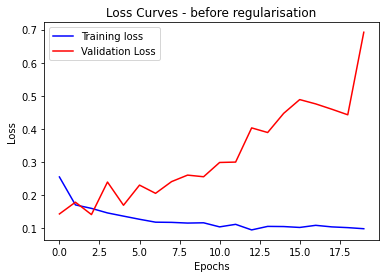

In [13]:
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

Try Again

In [20]:
#Although the validation and training loss seem great, we can see that the validation #loss increases
#This identifies overfitting in our network. How do we proceed? #Introduce regularisation to the model

from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
 metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), 
 epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 99us/sample - loss: 1.0053 - acc: 0.6789 - val_loss: 0.3032 - val_acc: 0.9149
Epoch 2/20
50000/50000 [==============================] - 4s 77us/sample - loss: 0.3868 - acc: 0.8860 - val_loss: 0.2074 - val_acc: 0.9412
Epoch 3/20
50000/50000 [==============================] - 4s 76us/sample - loss: 0.2874 - acc: 0.9169 - val_loss: 0.1656 - val_acc: 0.9523
Epoch 4/20
50000/50000 [==============================] - 3s 69us/sample - loss: 0.2337 - acc: 0.9325 - val_loss: 0.1395 - val_acc: 0.9604
Epoch 5/20
50000/50000 [==============================] - 4s 79us/sample - loss: 0.2008 - acc: 0.9418 - val_loss: 0.1238 - val_acc: 0.9634
Epoch 6/20
50000/50000 [==============================] - 3s 69us/sample - loss: 0.1760 - acc: 0.9478 - val_loss: 0.1164 - val_acc: 0.9658
Epoch 7/20
50000/50000 [==============================] - 3s 64us/sample - loss: 0.1553 - acc: 0.9541 - val_loss: 0.

In [21]:
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Test loss: 0.07004400733717485
Test accuracy: 0.9807999730110168


Text(0.5, 1.0, 'Loss Curves - after regularisation')

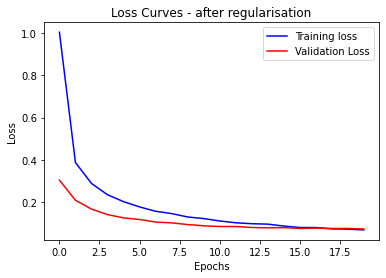

In [23]:
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')